# Building a Neural Network to recognize Quick Draw doodles

The general idea of this notebook will be to try and test the solutions provided by Google AI and other kagglers to the classification problem linked to the Quick Draw dataset.

## Google AI suggestion

Building a Neural Network dataset introducting LSTM layers. Indeed, they want to take into account the notion of temporality by using layers that keep track of what happened before. They also do not want to use a Neural Network that would consider the input as an image by using 1D Convolutionnal Layers. It's worth a try ! 

Tutorial of Google AI's solution in Tensorflow right here : https://www.tensorflow.org/tutorials/sequences/recurrent_quickdraw

## Considering the dataset as images only

A simpler idea would consist in interpreting the vectors of coordinates of the dataset as images only. Thus, we could use classical Neural Networks architectures that would consist in a succession of 2D Convolutionnal Layers and Max Pooling Layers, ending with a Flatten Layer then a FC layer.

Exemple of such a solution in Tensorflow here : https://www.kaggle.com/gaborfodor/black-white-cnn-lb-0-75/notebook

## Reading the data

In [116]:
import pandas as pd 
import numpy as np 
import ast
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import glob

In [126]:
path = '../data/data_train/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col='key_id',nrows=100).drop(['countrycode', 'recognized', 'timestamp'], axis=1)[:100]
    list_.append(df)
data = pd.concat(list_)

In [127]:
data.drawing = data.drawing.map(ast.literal_eval)

In [133]:
first_ten_ids = data.sample(20).index
data_images = data.loc[first_ten_ids, 'drawing']
data_images

key_id
6347776923271168    [[[53, 13, 6, 1, 0, 3, 22, 34, 73, 137, 180, 2...
5808550653722624    [[[9, 7, 10, 1, 11, 99, 182, 255, 242, 236, 22...
6684432427646976    [[[30, 22, 21, 25, 45, 60, 77, 94, 137, 167, 1...
5826758949470208    [[[148, 118, 81, 48, 25, 5, 0, 2, 9, 35, 70, 1...
5126657222377472    [[[88, 74, 53, 13, 4, 0, 0, 8, 19, 35, 54, 77,...
4782847170707456    [[[105, 41, 22, 8, 7, 12, 31, 59, 81, 100, 114...
5925373025976320    [[[172, 89, 33, 2, 2, 6, 41, 121, 241, 254, 25...
6293161578070016    [[[60, 110, 145, 156, 147, 144, 132, 131, 123,...
4567518247124992    [[[171, 143, 104, 64, 40, 18, 7, 2, 0, 3, 11, ...
5244713621782528    [[[182, 120, 53, 35, 20, 7, 2, 4, 16, 33, 134,...
5450877169041408    [[[255, 87, 2, 0, 5, 122, 218], [84, 85, 89, 1...
6499190387507200    [[[115, 100, 82, 53, 27, 16, 16, 20, 31, 46, 6...
5859874808266752    [[[109, 67, 36, 11, 2, 0, 1, 7, 17, 31, 70, 89...
4980213937078272    [[[19, 29, 61, 168, 244, 244, 219, 157, 71, 17...
6553321202515

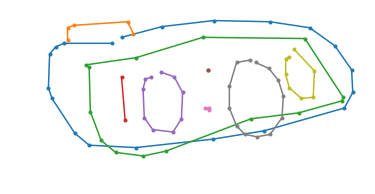

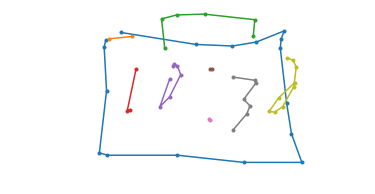

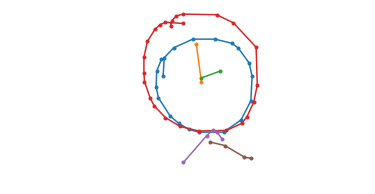

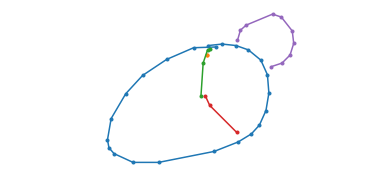

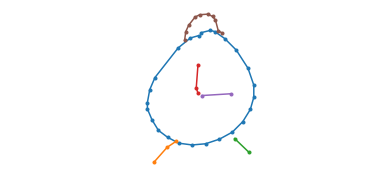

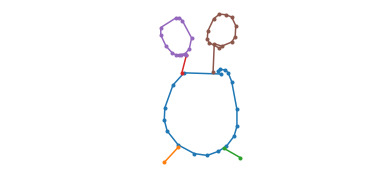

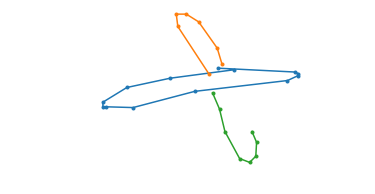

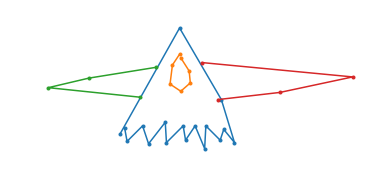

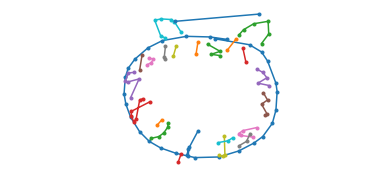

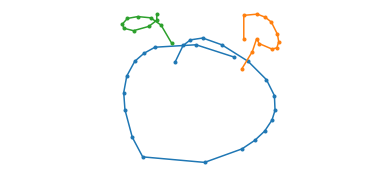

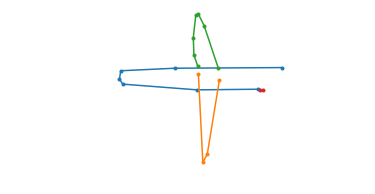

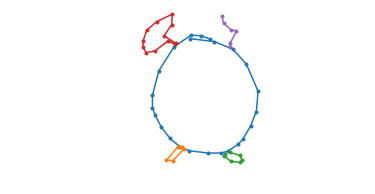

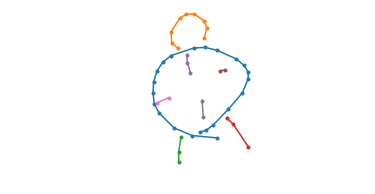

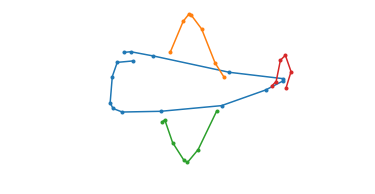

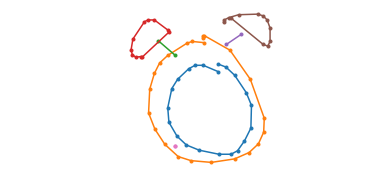

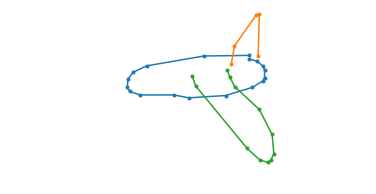

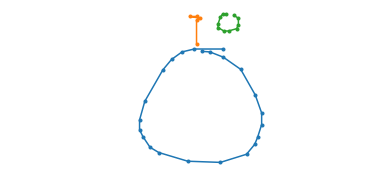

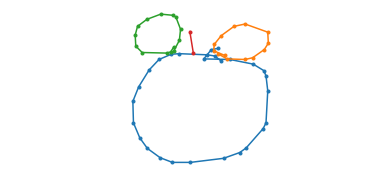

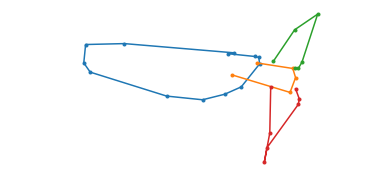

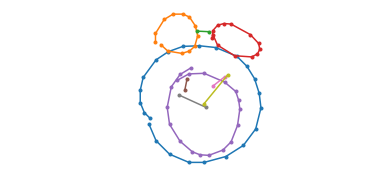

In [134]:
for index, data_drawing in enumerate(data_images, 0):
    
    plt.figure(figsize=(6,3))

    for x,y in data_drawing:
        plt.plot(x, y, marker='.')
        plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()  

## Transforming data to image

In [94]:
BASE_SIZE = 256

def draw_cv2(raw_strokes, size=BASE_SIZE, lw=6):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for stroke in raw_strokes:
        for i in range(len(stroke[0]) - 1):
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i + 1], stroke[1][i + 1]), 255, lw)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img

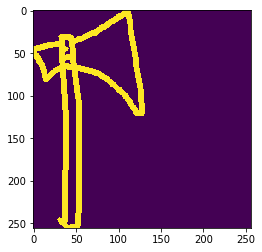

In [108]:
img = draw_cv2(array[9], size=256)
plt.imshow(img)

In [73]:
array = []
for ind, im in enumerate(axe_images):
    array.append(im)

In [102]:
max(array[0])

[[134, 133, 144, 144], [0, 84, 207, 253]]

In [136]:
class convNet(nn.Module):
    #constructor
    def __init__(self):
        super(convNet, self).__init__()
        #defining layers in convnet
        #input size=256x256x1
        self.conv1 = nn.Conv2d(1, 96, kernel_size=3,stride=1,padding=1)
        #conv1: 256x256x1 -> 28x28x96
        self.conv2 = nn.Conv2d(96, 256, kernel_size=3,stride=1,padding=1)
        #conv2: 28x28x96 -> 28x28x256
        self.conv3 = nn.Conv2d(256,384,kernel_size=3,stride=1,padding=1)
        #conv3: 28x28x256 -> 28x28x384
        #pooling: 28x28x384 -> 14x14x384
        self.conv4 = nn.Conv2d(384,512,kernel_size=3,stride=1,padding=1)
        #conv4: 14x14x384 -> 14x14x512
        #pooling: 14x14x512 -> 7x7x512        
        self.fc1   = nn.Linear(7*7*512, 300)
        self.fc2   = nn.Linear(300, 100)
        self.fc3   = nn.Linear(100, 10)
    
def forward(self, x):
    conv1_relu = nnFunctions.relu(self.conv1(x))
    conv2_relu = nnFunctions.relu(self.conv2(conv1_relu))
    conv3_relu =nnFunctions.max_pool2d(nnFunctions.relu(self.conv3(conv2_relu)),2)
    conv4_relu =nnFunctions.max_pool2d(nnFunctions.relu(self.conv4(conv3_relu)),2)

    x = conv4_relu.view(-1, 7*7*512)
    x = nnFunctions.relu(self.fc1(x))
    x = nnFunctions.relu(self.fc2(x))
    x = self.fc3(x)
    return x